In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [51]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [52]:
len(X_train)

60000

In [53]:
len(X_test)

10000

In [54]:
X_train.shape

(60000, 28, 28)

In [55]:
X_train = X_train /255
X_test = X_test /255

In [56]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

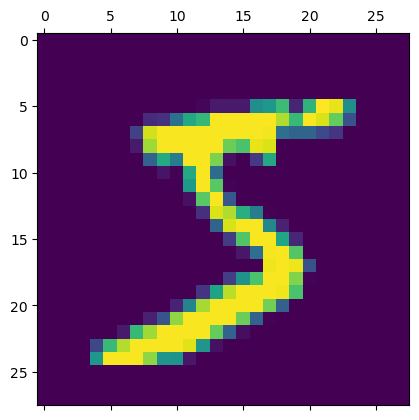

In [57]:
plt.matshow(X_train[0])

In [58]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [61]:
X_train_flattened.shape

(60000, 784)

In [62]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [64]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4699 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3042 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9258


In [65]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2688 - accuracy: 0.9240


[0.26884159445762634, 0.9240000247955322]

In [66]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [67]:
y_predicted[0]

array([2.8924070e-02, 4.1620356e-07, 3.8730711e-02, 9.5988780e-01,
       2.9098671e-03, 1.0825992e-01, 1.1583263e-06, 9.9974006e-01,
       7.7292792e-02, 7.3499107e-01], dtype=float32)

In [68]:
np.argmax(y_predicted[0])

7

In [69]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [70]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(58.222222222222214, 0.5, 'Truth')

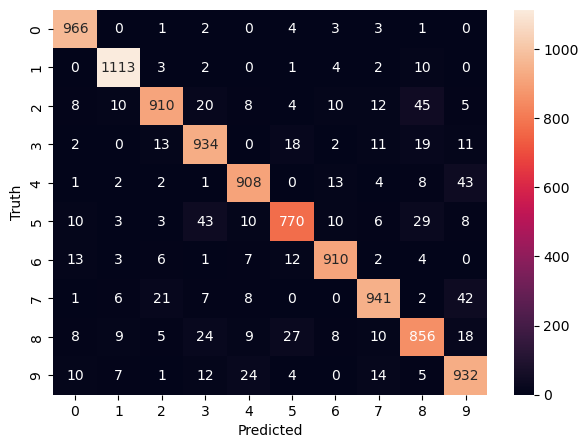

In [71]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(100, activation = 'sigmoid')
    
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [73]:
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1979 - accuracy: 0.9426
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0756 - accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0495 - accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0262 - accuracy: 0.9915


In [74]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0834 - accuracy: 0.9762


[0.08342762291431427, 0.9761999845504761]

313/313 [==============================] - 1s 4ms/step


Text(58.222222222222214, 0.5, 'Truth')

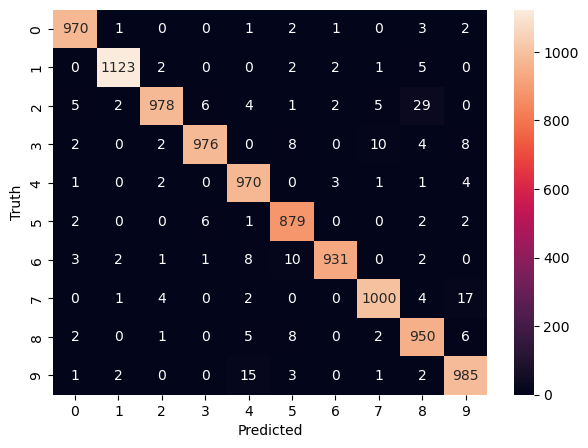

In [75]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
cnn = models.Sequential([
    
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    
    layers.Conv2D(filters=12, kernel_size = (3,3), activation = 'relu', input_shape = (28,28)),
    layers.MaxPooling2D((2,2)),          #filter is no. of filters(behind and behind like a cube, kernel_size(filter_size)2*2)
    
    layers.Conv2D(filters=12, kernel_size = (3,3), activation = 'relu', input_shape = (28,28)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])

#The Conv2D layer expects input data with a minimum dimensionality of 4 (batch size, height, width, channels), but it seems like your input data has a dimensionality of 3.
#Make sure that your input data has the correct shape. If you're working with grayscale images, you need to explicitly specify the channel dimension. Assuming your images are grayscale and have a shape of (28, 28), you should reshape them to (28, 28, 1).

In [77]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [78]:
cnn.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2007 - accuracy: 0.9400
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0675 - accuracy: 0.9793
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0394 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0315 - accuracy: 0.9902


In [79]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9858


[0.045289523899555206, 0.98580002784729]

In [83]:
y_pred = cnn.predict(X_test)
y_pred[:5]

y_argmax = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 4ms/step


In [84]:
from sklearn.metrics import classification_report , confusion_matrix

print('Classification Report: \n' , classification_report(y_test, y_argmax))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [85]:
y_argmax[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [86]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)